![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

For the Flatiron Data Science Live Phase two project, we were assigned to take the King County housing data set and design a mulitple linear regression model to predict the cost of a home. 
## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

### Stakeholders: small real estate company who advises families on selling their homes
### Pain points: 

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [581]:
# import relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [582]:
data = pd.read_csv('../../data/kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [583]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

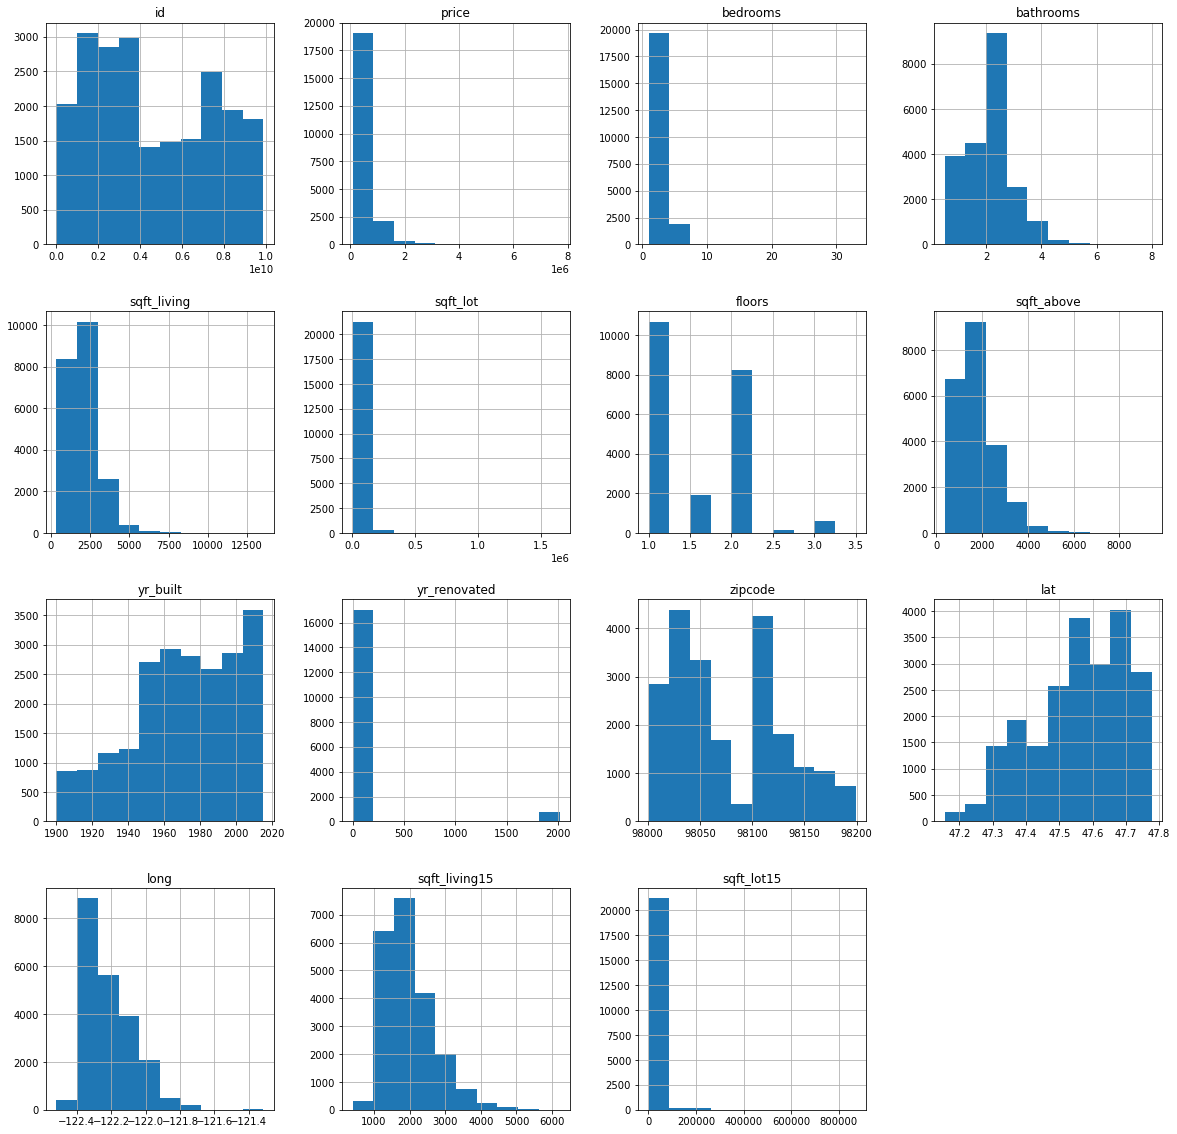

In [584]:
data.hist(figsize=(20,20));

Some of these features look like they could use some log processing.

In [585]:
datalog = pd.DataFrame()
log_cols = ['id','price','sqft_living','sqft_lot','sqft_above']
for col in log_cols:
    if col == 'id':
        datalog[col] = data[col]
        continue
    datalog[f'{col}_log'] = data[col].map(lambda x: np.log(x))

In [586]:
data = pd.merge(data,datalog,on='id')

In [587]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_log',
       'sqft_living_log', 'sqft_lot_log', 'sqft_above_log'],
      dtype='object')

In [588]:
len(data)

21953

In [589]:
data = data.drop_duplicates("id")

In [590]:
len(data)

21420

In [591]:
data['sqft_basement'].value_counts()

0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [592]:
data.loc[data['sqft_basement'] == '?','sqft_basement'] = np.nan

In [593]:
data['sqft_basement'].value_counts()

0.0       12717
600.0       216
500.0       206
700.0       205
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [594]:
def tryfloat(x):
    try:
        return float(x)
    except:
        return x

In [595]:
data['sqft_basement'] = data['sqft_basement'].map(tryfloat)

In [596]:
rel_cols = ['price', 'price_log', 'grade', 'condition', 'view', 'sqft_living',
            'sqft_living_log', 'sqft_lot', 'sqft_lot_log', 'sqft_above', 'sqft_above_log',
            'sqft_basement', 'bedrooms', 'bathrooms', 'floors']
data = data[rel_cols]

In [597]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21952
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21420 non-null  float64
 1   price_log        21420 non-null  float64
 2   grade            21420 non-null  object 
 3   condition        21420 non-null  object 
 4   view             21357 non-null  object 
 5   sqft_living      21420 non-null  int64  
 6   sqft_living_log  21420 non-null  float64
 7   sqft_lot         21420 non-null  int64  
 8   sqft_lot_log     21420 non-null  float64
 9   sqft_above       21420 non-null  int64  
 10  sqft_above_log   21420 non-null  float64
 11  sqft_basement    20968 non-null  float64
 12  bedrooms         21420 non-null  int64  
 13  bathrooms        21420 non-null  float64
 14  floors           21420 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 2.6+ MB


In [598]:
data.describe()

,price,price_log,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,sqft_basement,bedrooms,bathrooms,floors
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,20968.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,13.048915,2083.132633,7.552148,1.512804e+04,8.989676,1791.170215,7.396578,292.067484,3.373950,2.118429,1.495985
std,3.679311e+05,0.526726,918.808412,0.424047,4.153080e+04,0.903854,828.692965,0.427241,442.697190,0.925405,0.768720,0.540081
min,7.800000e+04,11.264464,370.000000,5.913503,5.200000e+02,6.253829,370.000000,5.913503,0.000000,1.000000,0.500000,1.000000
25%,3.225000e+05,12.683858,1430.000000,7.265430,5.040000e+03,8.525161,1200.000000,7.090077,0.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,13.017003,1920.000000,7.560080,7.614000e+03,8.937744,1560.000000,7.352441,0.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,13.377006,2550.000000,7.843849,1.069050e+04,9.277111,2220.000000,7.705262,560.000000,4.000000,2.500000,2.000000
max,7.700000e+06,15.856731,13540.000000,9.513404,1.651359e+06,14.317109,9410.000000,9.149528,4820.000000,33.000000,8.000000,3.500000


In [599]:
data['view'].value_counts()

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [600]:
data['view'].value_counts()[0]/len(data)

0.8988328664799253

In [601]:
# delete 'view' column since not much information given
data.drop(columns='view', inplace=True)

In [602]:
for col in data.columns:
    print(f'\n{col}:\n')
    print(data.sort_values(by=col,ascending=False).head(15))


price:

           price  price_log         grade condition  sqft_living  \
7361   7700000.0  15.856731    13 Mansion      Good        12050   
3976   7060000.0  15.769956  11 Excellent   Average        10040   
9395   6890000.0  15.745582    13 Mansion   Average         9890   
4479   5570000.0  15.532906    13 Mansion   Average         9200   
1470   5350000.0  15.492607     12 Luxury   Average         8000   
1337   5300000.0  15.483217     12 Luxury      Good         7390   
1182   5110000.0  15.446710     12 Luxury   Average         8010   
8209   4670000.0  15.356670     12 Luxury   Average         9640   
2670   4500000.0  15.319588     12 Luxury   Average         6640   
8767   4490000.0  15.317363     12 Luxury   Average         6430   
12576  4210000.0  15.252973     12 Luxury   Average         7440   
4215   4000000.0  15.201805     12 Luxury   Average         7080   
2117   3850000.0  15.163584  11 Excellent      Good         5770   
7140   3800000.0  15.150512    13 Mansi

           price  price_log         grade condition  sqft_living  \
12990  2280000.0  14.639686     12 Luxury   Average        13540   
9395   6890000.0  15.745582    13 Mansion   Average         9890   
7361   7700000.0  15.856731    13 Mansion      Good        12050   
18616  3300000.0  15.009433  11 Excellent   Average         8020   
13636  2420000.0  14.699278    13 Mansion   Average         7880   
20186  2700000.0  14.808762     12 Luxury   Average         7850   
3976   7060000.0  15.769956  11 Excellent   Average        10040   
12065  1950000.0  14.483340     12 Luxury   Average         7420   
18909  1140000.0  13.946539  11 Excellent   Average         7320   
1470   5350000.0  15.492607     12 Luxury   Average         8000   
17057  1920000.0  14.467836     12 Luxury   Average         7730   
11283  1820000.0  14.414347     12 Luxury   Average         6640   
20784  1600000.0  14.285514  11 Excellent   Average         6530   
8767   4490000.0  15.317363     12 Luxury   Aver

           price  price_log      grade  condition  sqft_living  \
11786   544000.0  13.206705     8 Good    Average         1760   
20640   525000.0  13.171154     8 Good    Average         1310   
10236   435000.0  12.983101     8 Good    Average         1440   
18790  3300000.0  15.009433  12 Luxury  Very Good         7710   
21108   563500.0  13.241923     8 Good    Average         1400   
15690   479000.0  13.079456     8 Good    Average         1730   
15133   525000.0  13.171154     8 Good    Average         1730   
1000    535000.0  13.190022  7 Average    Average         1360   
17706   557000.0  13.230321     8 Good    Average         1630   
6638    598200.0  13.301680     8 Good    Average         2980   
4589    407000.0  12.916568     8 Good    Average         1430   
20908   479950.0  13.081437   9 Better    Average         1820   
20359   450000.0  13.017003     8 Good    Average         1810   
11822   472000.0  13.064734     8 Good    Average         1180   
3021    42

33 bedrooms is pretty crazy and not highly correlated with a high price. I'll remove that one.

In [603]:
data = data[data['bedrooms'] != 33]

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


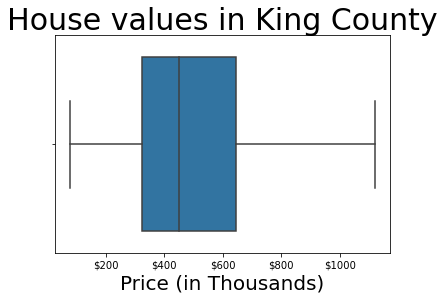

<Figure size 432x288 with 0 Axes>

In [604]:
ax = sns.boxplot(data['price']/1000, orient='h', showfliers=False)
ax.axes.set_title("House values in King County",fontsize=30)
ax.set_xlabel("Price (in Thousands)",fontsize=20)
ax.tick_params(labelsize=10)
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.show()
plt.savefig("House_prices_in_King_County_box_plot.png")

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


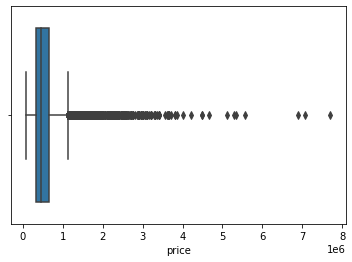

In [605]:
sns.boxplot(data['price'], orient='h');

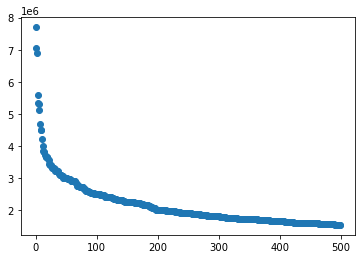

In [606]:
fig, ax = plt.subplots()
ax.scatter(x=range(500), y=data.sort_values('price', ascending=False)['price'][:500])

In [607]:
# homes >= $2 mil are significant outliers, we'll remove them
# Only account for 0.95% of all the data
len(data[data['price'] >= 2000000])/len(data)

0.009711004248564359

In [608]:
len(data)

21419

In [609]:
data = data[data['price'] < 2000000]

In [610]:
data["price"].mean()

519177.5913441139

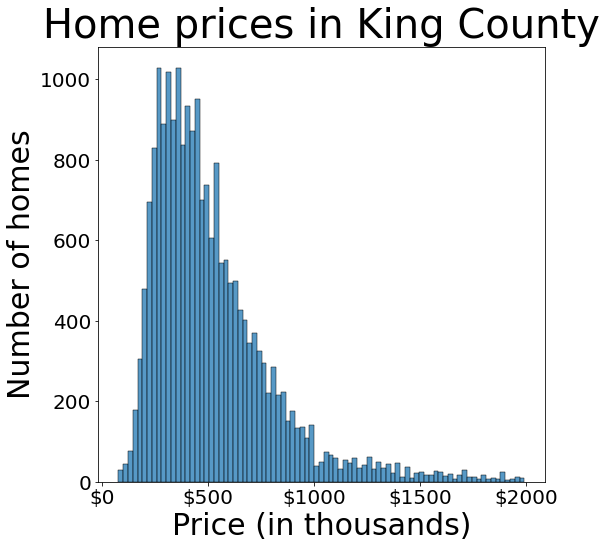

In [611]:
fig, ax = plt.subplots(figsize= (8,8))
ax = sns.histplot(data["price"]/1000)

ax.set_title("Home prices in King County",fontsize=40)
ax.set_xlabel("Price (in thousands)",fontsize=30)
ax.set_ylabel("Number of homes",fontsize=30)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.savefig("House_prices.png")

In [612]:
# sns.pairplot(data);

In [613]:
data.corr()

,price,price_log,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,sqft_basement,bedrooms,bathrooms,floors
price,1.000000,0.941537,0.679370,0.629791,0.097156,0.145628,0.584342,0.552887,0.285677,0.325003,0.508784,0.278395
price_log,0.941537,1.000000,0.666314,0.655003,0.097791,0.119942,0.569866,0.563827,0.285809,0.338821,0.522754,0.306533
sqft_living,0.679370,0.666314,1.000000,0.962572,0.174213,0.340383,0.867864,0.845020,0.404472,0.598497,0.742126,0.352524
sqft_living_log,0.629791,0.655003,0.962572,1.000000,0.148557,0.318594,0.827452,0.859608,0.404348,0.635979,0.752694,0.361452
sqft_lot,0.097156,0.097791,0.174213,0.148557,1.000000,0.640746,0.183254,0.161812,0.011801,0.033468,0.085077,-0.008236
sqft_lot_log,0.145628,0.119942,0.340383,0.318594,0.640746,1.000000,0.324267,0.310798,0.084036,0.186121,0.085292,-0.245445
sqft_above,0.584342,0.569866,0.867864,0.827452,0.183254,0.324267,1.000000,0.966671,-0.102822,0.487111,0.668839,0.527447
sqft_above_log,0.552887,0.563827,0.845020,0.859608,0.161812,0.310798,0.966671,1.000000,-0.087321,0.524653,0.684475,0.545480
sqft_basement,0.285677,0.285809,0.404472,0.404348,0.011801,0.084036,-0.102822,-0.087321,1.000000,0.301585,0.254192,-0.264540
bedrooms,0.325003,0.338821,0.598497,0.635979,0.033468,0.186121,0.487111,0.524653,0.301585,1.000000,0.521798,0.176726


In [614]:
data.columns

Index(['price', 'price_log', 'grade', 'condition', 'sqft_living',
       'sqft_living_log', 'sqft_lot', 'sqft_lot_log', 'sqft_above',
       'sqft_above_log', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors'],
      dtype='object')

In [615]:
# fig, axes = plt.subplots(5,3, figsize=(20,20))
# for i, col in enumerate(data.columns):
#     sns.histplot(data=data, x=col, kde=True, ax=axes[i//3,i%3]);

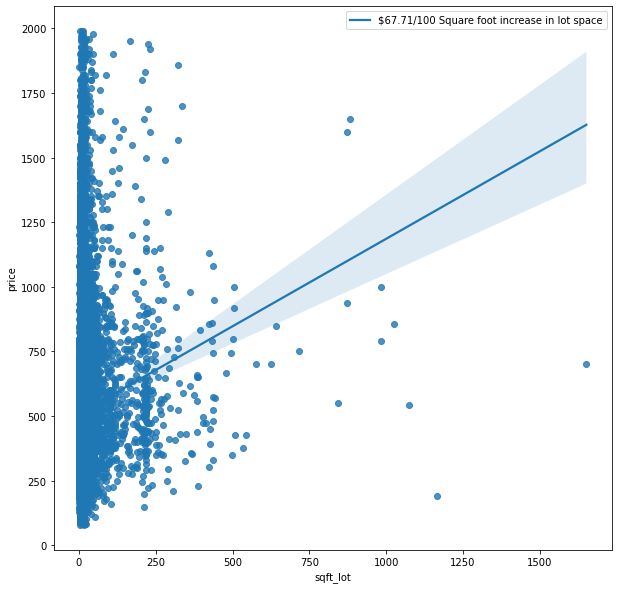

In [667]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data["sqft_lot"],data['price'])

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.regplot(x=(data["sqft_lot"]/1000), y=(data['price']/1000),
                 line_kws={'label':"${0:.2f}/100 Square foot increase in lot space".format(slope*100)},)
ax.legend()

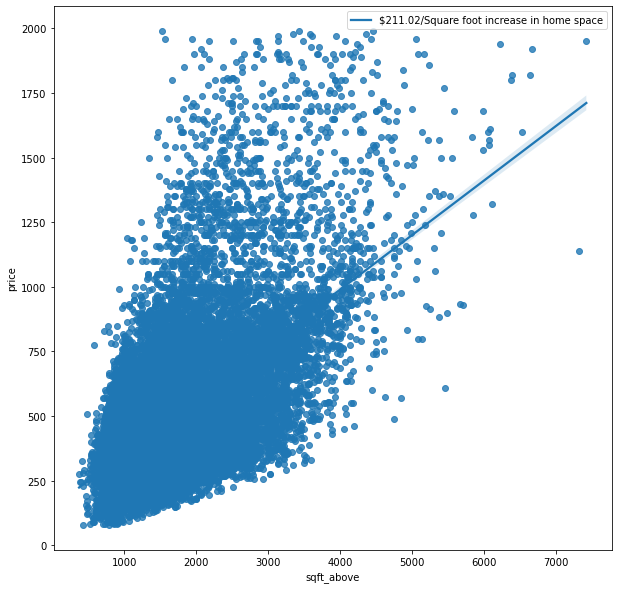

In [664]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["sqft_above"],data['price'])

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.regplot(x=(data["sqft_above"]), y=(data['price']/1000),
                 line_kws={'label':"${0:.2f}/Square foot increase in home space".format(slope)})
ax.legend()

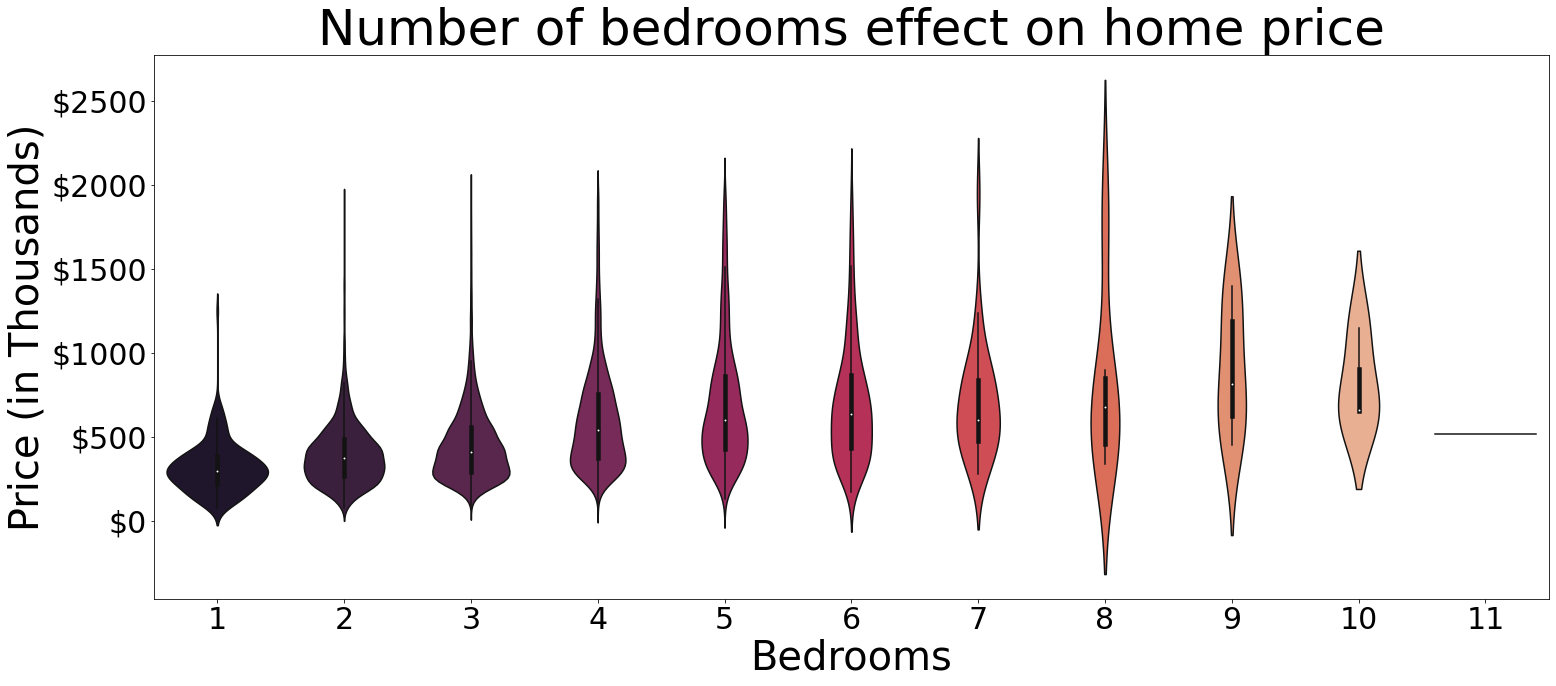

In [673]:
fig,ax = plt.subplots(figsize = (25,10))
sns.violinplot(x='bedrooms',y=(data['price']/1000), data = data, palette="rocket")

ax.set_title("Number of bedrooms effect on home price",fontsize=50)
ax.set_xlabel("Bedrooms",fontsize=40)
ax.set_ylabel("Price (in Thousands)",fontsize=40)
ax.tick_params(labelsize=30)
ax.yaxis.set_major_formatter('${x:1.0f}')
plt.savefig("catplot")

### Categorical: 'Grade' to only 4: Low, Average, Above Average, and Excellent

In [616]:
# Lows including 3 Poor, 5 Fair and 6 Low Average
data['grade'].replace('3 Poor','Low', inplace=True)
data['grade'].replace('5 Fair','Low', inplace=True)
data['grade'].replace('4 Low','Low', inplace=True)
data['grade'].replace('6 Low Average','Low', inplace=True)

# Average including 7 Average 
data['grade'].replace('7 Average','Average', inplace=True)

# Average Above including 8 Good,9 Better
data['grade'].replace('8 Good','Above Average', inplace=True)
data['grade'].replace('9 Better','Above Average', inplace=True)

# Excellent including 10 Very Good, 11 Excellent,12 Luxury and 13 Mansion
data['grade'].replace('10 Very Good','Excellent', inplace=True)
data['grade'].replace('11 Excellent','Excellent', inplace=True)
data['grade'].replace('12 Luxury','Excellent', inplace=True)
data['grade'].replace('13 Mansion','Excellent', inplace=True)

In [617]:
data['grade'].value_counts(normalize=True)

Average          0.418981
Above Average    0.406487
Low              0.106407
Excellent        0.068125
Name: grade, dtype: float64

### Categorical: 'Condition' to only 3: Low, Average, and Good

In [618]:
data['condition'].value_counts(normalize=True)

Average      0.649239
Good         0.263778
Very Good    0.078073
Fair         0.007590
Poor         0.001320
Name: condition, dtype: float64

In [619]:
# Poor including Poor and Fair
data['condition'].replace('Poor','Poor', inplace=True)
data['condition'].replace('Fair','Poor', inplace=True)


#Average staying the same
data['condition'].replace('Average','Average', inplace=True)

# Good including Good and VeryGood
data['condition'].replace('Good','Good', inplace=True)
data['condition'].replace('Very Good','Good', inplace=True)

data['condition'].value_counts(normalize=True)

Average    0.649239
Good       0.341851
Poor       0.008910
Name: condition, dtype: float64

In [620]:
# data.groupby(by=['condition','grade']).agg(['mean','count'])['price']

In [621]:
# data.groupby(by=['grade','condition']).agg(['mean','count'])['price']

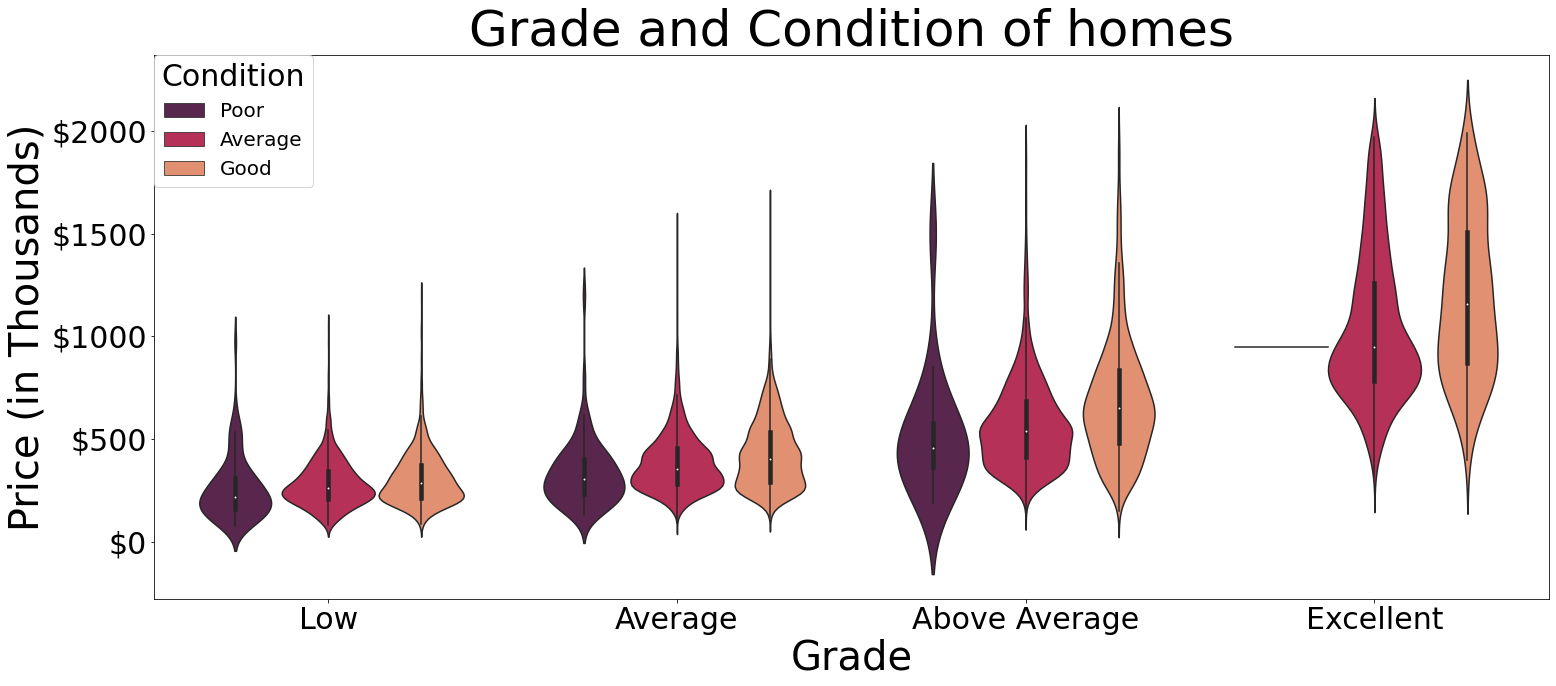

In [645]:
fig,ax = plt.subplots(figsize = (25,10))
sns.violinplot(x='grade',y=(data['price']/1000), hue= "condition", data = data, palette="rocket", 
               order=["Low", "Average", "Above Average", "Excellent"], hue_order = ["Poor", "Average", "Good"])

ax.set_title("Grade and Condition of homes",fontsize=50)
ax.set_xlabel("Grade",fontsize=40)
ax.set_ylabel("Price (in Thousands)",fontsize=40)
ax.tick_params(labelsize=30)
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.legend(loc="upper left", borderaxespad=0., title = "Condition",fontsize=20, title_fontsize=30)
plt.savefig("catplot")

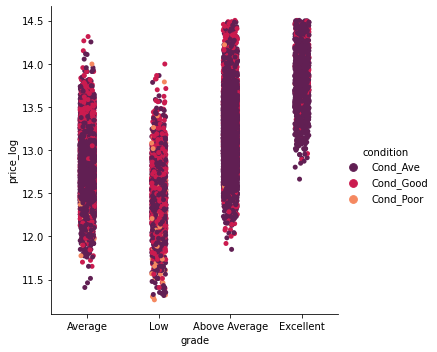

In [426]:
sns.catplot(x='grade',y='price_log', hue = "condition", data=data, palette="rocket")

In [427]:
cond = data[["condition"]]
ohe = OneHotEncoder(categories="auto", handle_unknown="error", sparse=False)
ohe.fit(cond)
cond_encod = ohe.transform(cond)
cond_encod = pd.DataFrame(
    # Pass in NumPy array
    cond_encod,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index= data.index
)
cond_encod.drop(columns='Cond_Ave', inplace=True)

In [428]:
grade = data[["grade"]]
ohe = OneHotEncoder(categories="auto",handle_unknown="ignore", sparse=False)
ohe.fit(grade)
grade_encod = ohe.transform(grade)
grade_encod = pd.DataFrame(
    # Pass in NumPy array
    grade_encod,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index= data.index
)
grade_encod.drop(columns='Average', inplace=True)

In [429]:
data = pd.concat([data, cond_encod, grade_encod], axis=1)\
        .drop(columns=['condition','grade'])

### Changing sqft_basement to a binomial variable "has_basement"

In [430]:
# replace sqft_basement with basement: True (1) / False (0)
data['sqft_basement'] = data['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
data.rename(columns={'sqft_basement':'has_basement'}, inplace=True)

In [431]:
data

,price,price_log,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Cond_Good,Cond_Poor,Above Average,Excellent,Low
0,221900.0,12.309982,1180,7.073270,5650,8.639411,1180,7.073270,0,3,1.00,1.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,13.195614,2570,7.851661,7242,8.887653,2170,7.682482,1,3,2.25,2.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,12.100712,770,6.646391,10000,9.210340,770,6.646391,0,2,1.00,1.0,0.0,0.0,0.0,0.0,1.0
3,604000.0,13.311329,1960,7.580700,5000,8.517193,1050,6.956545,1,4,3.00,1.0,1.0,0.0,0.0,0.0,0.0
4,510000.0,13.142166,1680,7.426549,8080,8.997147,1680,7.426549,0,3,2.00,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21948,360000.0,12.793859,1530,7.333023,1131,7.030857,1530,7.333023,0,3,2.50,3.0,0.0,0.0,1.0,0.0,0.0
21949,400000.0,12.899220,2310,7.745003,5813,8.667852,2310,7.745003,0,4,2.50,2.0,0.0,0.0,1.0,0.0,0.0
21950,402101.0,12.904459,1020,6.927558,1350,7.207860,1020,6.927558,0,2,0.75,2.0,0.0,0.0,0.0,0.0,0.0
21951,400000.0,12.899220,1600,7.377759,2388,7.778211,1600,7.377759,0,3,2.50,2.0,0.0,0.0,1.0,0.0,0.0


In [432]:
data.corr()

,price,price_log,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Cond_Good,Cond_Poor,Above Average,Excellent,Low
price,1.000000,0.941537,0.679370,0.629791,0.097156,0.145628,0.584342,0.552887,0.175257,0.325003,0.508784,0.278395,0.000315,-0.067465,0.255133,0.515070,-0.270319
price_log,0.941537,1.000000,0.666314,0.655003,0.097791,0.119942,0.569866,0.563827,0.197646,0.338821,0.522754,0.306533,-0.006372,-0.098097,0.341057,0.427027,-0.357206
sqft_living,0.679370,0.666314,1.000000,0.962572,0.174213,0.340383,0.867864,0.845020,0.189572,0.598497,0.742126,0.352524,-0.097081,-0.073579,0.319024,0.518781,-0.356622
sqft_living_log,0.629791,0.655003,0.962572,1.000000,0.148557,0.318594,0.827452,0.859608,0.223714,0.635979,0.752694,0.361452,-0.086061,-0.090634,0.383171,0.421951,-0.447542
sqft_lot,0.097156,0.097791,0.174213,0.148557,1.000000,0.640746,0.183254,0.161812,-0.036467,0.033468,0.085077,-0.008236,0.005210,0.039408,0.013346,0.114777,-0.008638
sqft_lot_log,0.145628,0.119942,0.340383,0.318594,0.640746,1.000000,0.324267,0.310798,-0.054065,0.186121,0.085292,-0.245445,0.113461,0.043159,-0.029005,0.207617,-0.004090
sqft_above,0.584342,0.569866,0.867864,0.827452,0.183254,0.324267,1.000000,0.966671,-0.235504,0.487111,0.668839,0.527447,-0.194130,-0.063937,0.315555,0.525435,-0.313507
sqft_above_log,0.552887,0.563827,0.845020,0.859608,0.161812,0.310798,0.966671,1.000000,-0.231910,0.524653,0.684475,0.545480,-0.182504,-0.076013,0.387245,0.439025,-0.391505
has_basement,0.175257,0.197646,0.189572,0.223714,-0.036467,-0.054065,-0.235504,-0.231910,1.000000,0.154750,0.149617,-0.260286,0.121244,-0.019809,0.024901,-0.011508,-0.122098
bedrooms,0.325003,0.338821,0.598497,0.635979,0.033468,0.186121,0.487111,0.524653,0.154750,1.000000,0.521798,0.176726,0.003144,-0.059082,0.189321,0.178162,-0.279978


In [433]:
datafeat = data.drop(columns=['price','price_log'])
datafeat.corr()

,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Cond_Good,Cond_Poor,Above Average,Excellent,Low
sqft_living,1.000000,0.962572,0.174213,0.340383,0.867864,0.845020,0.189572,0.598497,0.742126,0.352524,-0.097081,-0.073579,0.319024,0.518781,-0.356622
sqft_living_log,0.962572,1.000000,0.148557,0.318594,0.827452,0.859608,0.223714,0.635979,0.752694,0.361452,-0.086061,-0.090634,0.383171,0.421951,-0.447542
sqft_lot,0.174213,0.148557,1.000000,0.640746,0.183254,0.161812,-0.036467,0.033468,0.085077,-0.008236,0.005210,0.039408,0.013346,0.114777,-0.008638
sqft_lot_log,0.340383,0.318594,0.640746,1.000000,0.324267,0.310798,-0.054065,0.186121,0.085292,-0.245445,0.113461,0.043159,-0.029005,0.207617,-0.004090
sqft_above,0.867864,0.827452,0.183254,0.324267,1.000000,0.966671,-0.235504,0.487111,0.668839,0.527447,-0.194130,-0.063937,0.315555,0.525435,-0.313507
sqft_above_log,0.845020,0.859608,0.161812,0.310798,0.966671,1.000000,-0.231910,0.524653,0.684475,0.545480,-0.182504,-0.076013,0.387245,0.439025,-0.391505
has_basement,0.189572,0.223714,-0.036467,-0.054065,-0.235504,-0.231910,1.000000,0.154750,0.149617,-0.260286,0.121244,-0.019809,0.024901,-0.011508,-0.122098
bedrooms,0.598497,0.635979,0.033468,0.186121,0.487111,0.524653,0.154750,1.000000,0.521798,0.176726,0.003144,-0.059082,0.189321,0.178162,-0.279978
bathrooms,0.742126,0.752694,0.085077,0.085292,0.668839,0.684475,0.149617,0.521798,1.000000,0.504878,-0.183144,-0.085909,0.378187,0.364774,-0.405277
floors,0.352524,0.361452,-0.008236,-0.245445,0.527447,0.545480,-0.260286,0.176726,0.504878,1.000000,-0.313795,-0.058180,0.353925,0.212181,-0.247233


In [434]:
data.corr().abs().sort_values('price_log',ascending=False)['price_log']

price_log          1.000000
price              0.941537
sqft_living        0.666314
sqft_living_log    0.655003
sqft_above         0.569866
sqft_above_log     0.563827
bathrooms          0.522754
Excellent          0.427027
Low                0.357206
Above Average      0.341057
bedrooms           0.338821
floors             0.306533
has_basement       0.197646
sqft_lot_log       0.119942
Cond_Poor          0.098097
sqft_lot           0.097791
Cond_Good          0.006372
Name: price_log, dtype: float64

In [435]:
datafeat = data.drop(columns=['price_log','price'])
dtfc = datafeat.corr().abs().stack().reset_index().sort_values(0, ascending=False)

dtfc['col_pairs'] = list(zip(dtfc.level_0,dtfc.level_1))
dtfc['same'] = dtfc['col_pairs'].map(lambda x: (x[0] in x[1]) or (x[1] in x[0]))
dtfc['col_pairs'] = dtfc['col_pairs'].map(lambda x:sorted(list(x)))
dtfc.set_index(['col_pairs'],inplace=True)
dtfc = dtfc[dtfc['same'] == False]
dtfc.drop(columns=['level_0','level_1','same'],inplace=True)
dtfc.columns = ['C']
dtfc.drop_duplicates(inplace=True)
dtfc.head(20)

,C
col_pairs,
"[sqft_above, sqft_living]",0.867864
"[sqft_above_log, sqft_living_log]",0.859608
"[sqft_above_log, sqft_living]",0.845020
"[sqft_above, sqft_living_log]",0.827452
"[bathrooms, sqft_living_log]",0.752694
"[bathrooms, sqft_living]",0.742126
"[bathrooms, sqft_above_log]",0.684475
"[bathrooms, sqft_above]",0.668839
"[bedrooms, sqft_living_log]",0.635979


## Let's build models.
### Preprocessing:

#### Feature Engineering:

In [436]:
#bedrooms/sqfoot of living space
data["bedroom/sqft_living_log"] = data["bedrooms"] / data["sqft_living_log"]
#bathrooms/sqfoot of living space 
data["bathrooms/sqft_living_log"] = data["bathrooms"] / data["sqft_living_log"]
#floors/sq foor of living space
data["floors/sqft_living_log"] = data["floors"] / data["sqft_living_log"]
# basement / square foot of living space
data["has_basement*sqft_living_log"] = data['has_basement']\
                                        * data["sqft_living_log"]
# House size to lot size ration
data["sqft_living_log/sqft_lot_log"] = data["sqft_living_log"] / data["sqft_lot_log"]

In [437]:
data.columns

Index(['price', 'price_log', 'sqft_living', 'sqft_living_log', 'sqft_lot',
       'sqft_lot_log', 'sqft_above', 'sqft_above_log', 'has_basement',
       'bedrooms', 'bathrooms', 'floors', 'Cond_Good', 'Cond_Poor',
       'Above Average', 'Excellent', 'Low', 'bedroom/sqft_living_log',
       'bathrooms/sqft_living_log', 'floors/sqft_living_log',
       'has_basement*sqft_living_log', 'sqft_living_log/sqft_lot_log'],
      dtype='object')

In [438]:
X = data.drop(columns=['price_log','price'])

X_train, X_test, y_train, y_test = \
train_test_split(X, data['price_log'], test_size=0.33, random_state=42)

In [439]:
X_train.describe()

,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Cond_Good,Cond_Poor,Above Average,Excellent,Low,bedroom/sqft_living_log,bathrooms/sqft_living_log,floors/sqft_living_log,has_basement*sqft_living_log,sqft_living_log/sqft_lot_log
count,14211.000000,14211.000000,1.421100e+04,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000,14211.000000
mean,2052.220533,7.541830,1.539518e+04,8.986775,1768.280205,7.387211,0.382169,3.358736,2.101787,1.495356,0.339666,0.008726,0.407431,0.068679,0.104919,0.442439,0.275413,0.197466,2.927533,0.846043
std,862.779689,0.415416,4.226203e+04,0.917233,795.027986,0.420404,0.485935,0.900901,0.746645,0.542247,0.473613,0.093006,0.491374,0.252917,0.306459,0.105491,0.087979,0.069241,3.728668,0.080530
min,380.000000,5.940171,5.200000e+02,6.253829,380.000000,5.940171,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.124901,0.064594,0.113802,0.000000,0.470020
25%,1420.000000,7.258412,5.001500e+03,8.517493,1190.000000,7.081709,0.000000,3.000000,1.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.391687,0.219176,0.135315,0.000000,0.797354
50%,1900.000000,7.549609,7.585000e+03,8.933928,1560.000000,7.352441,0.000000,3.000000,2.250000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.417956,0.287428,0.187273,0.000000,0.844185
75%,2530.000000,7.835975,1.057950e+04,9.266673,2190.000000,7.691657,1.000000,4.000000,2.500000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.512837,0.328265,0.254977,7.512071,0.896113
max,7730.000000,8.952864,1.164794e+06,13.968055,7420.000000,8.911934,1.000000,11.000000,7.500000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.373906,0.902910,0.487616,8.952864,1.245880


In [440]:
X_test.describe()

,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Cond_Good,Cond_Poor,Above Average,Excellent,Low,bedroom/sqft_living_log,bathrooms/sqft_living_log,floors/sqft_living_log,has_basement*sqft_living_log,sqft_living_log/sqft_lot_log
count,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,2059.059429,7.545577,1.423799e+04,8.974568,1772.214714,7.390465,0.381429,3.372286,2.101321,1.486143,0.346286,0.009286,0.404571,0.06700,0.109429,0.444109,0.275201,0.196081,2.922905,0.847015
std,862.209585,0.414653,3.856357e+04,0.872002,788.200296,0.418727,0.485772,0.889351,0.744144,0.533444,0.475820,0.095921,0.490844,0.25004,0.312198,0.103994,0.087585,0.067643,3.728897,0.078439
min,370.000000,5.913503,6.090000e+02,6.411818,370.000000,5.913503,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.125541,0.070689,0.114102,0.000000,0.500808
25%,1430.000000,7.265430,5.048000e+03,8.526747,1200.000000,7.090077,0.000000,3.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.392173,0.218028,0.135202,0.000000,0.798473
50%,1920.000000,7.560080,7.560000e+03,8.930626,1560.000000,7.352441,0.000000,3.000000,2.250000,1.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.417956,0.287137,0.182419,0.000000,0.844815
75%,2520.000000,7.832014,1.049775e+04,9.258916,2190.000000,7.691657,1.000000,4.000000,2.500000,2.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.514479,0.327896,0.254597,7.512071,0.896077
max,7480.000000,8.919988,1.651359e+06,14.317109,6640.000000,8.800867,1.000000,9.000000,6.750000,3.500000,1.000000,1.000000,1.000000,1.00000,1.000000,1.132860,0.756727,0.481272,8.919988,1.218371


In [441]:
y_train

21548    13.122363
950      13.997832
8474     13.142166
17447    12.542545
7691     12.608199
           ...    
11689    12.388394
12390    13.329378
5573     13.508985
896      12.206073
16386    13.304685
Name: price_log, Length: 14211, dtype: float64

In [442]:
y_test

17256    12.570716
14401    12.815838
16862    14.408837
7558     12.745486
14129    12.873902
           ...    
1545     13.480038
8866     12.201708
15311    13.120361
15078    12.889169
3406     12.833347
Name: price_log, Length: 7000, dtype: float64

In [443]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [444]:
X_train_scaled

,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,has_basement,bedrooms,bathrooms,floors,Cond_Good,Cond_Poor,Above Average,Excellent,Low,bedroom/sqft_living_log,bathrooms/sqft_living_log,floors/sqft_living_log,has_basement*sqft_living_log,sqft_living_log/sqft_lot_log
21548,-0.860297,-0.876375,-0.328798,-1.824634,-0.765132,-0.787450,1.271474,-1.508250,0.533355,0.930686,-0.717207,-0.093821,1.205987,-0.271558,-0.34237,-1.552805,0.828452,1.172349,1.139924,1.681893
950,1.863553,1.596984,0.165990,1.123514,0.077635,0.297012,1.271474,-0.398211,-0.136331,-0.913556,1.394297,-0.093821,1.205987,-0.271558,-0.34237,-0.728218,-0.359938,-1.091778,1.415484,-0.334484
8474,-0.083710,0.118013,-0.127949,0.242439,-0.538717,-0.444317,1.271474,0.711828,1.537884,-0.913556,-0.717207,-0.093821,1.205987,-0.271558,-0.34237,0.801153,1.736086,-0.949315,1.250710,-0.270333
17447,-0.860297,-0.876375,-0.208118,-0.209278,-0.576453,-0.498177,-0.786489,-1.508250,-1.475704,-0.913556,-0.717207,-0.093821,-0.829196,-0.271558,2.92082,-1.552805,-1.546951,-0.839819,-0.785169,-0.371376
7691,-0.048937,0.154214,-0.173452,0.009283,-0.853183,-0.935509,1.271474,-0.398211,-0.471174,-0.913556,1.394297,-0.093821,-0.829196,-0.271558,-0.34237,-0.455102,-0.515236,-0.953077,1.254743,-0.006226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11689,-0.037346,0.166161,-0.119809,0.279357,-0.953812,-1.116834,1.271474,0.711828,-0.471174,-0.913556,-0.717207,-0.093821,-0.829196,-0.271558,-0.34237,0.788026,-0.516941,-0.954315,1.256074,-0.280961
12390,0.194471,0.393434,-0.193352,-0.110784,0.341786,0.555424,1.271474,-0.398211,-0.471174,-0.913556,-0.717207,-0.093821,1.205987,-0.271558,-0.34237,-0.503325,-0.548965,-0.977567,1.281395,0.262802
5573,0.484242,0.650321,-0.089733,0.405848,-0.287145,-0.113402,1.271474,-0.398211,0.198512,0.930686,-0.717207,-0.093821,1.205987,-0.271558,-0.34237,-0.553742,0.143292,0.845646,1.310015,-0.140857
896,-0.153255,0.043936,-0.250190,-0.551494,-1.067019,-1.338847,1.271474,0.711828,-0.136331,-0.913556,-0.717207,10.658557,-0.829196,-0.271558,2.92082,0.821486,-0.123508,-0.941571,1.242457,0.563500


## Baseline Understanding

In [445]:
train_target_mean = y_train.mean()
baseline_train_pred = [train_target_mean] * len(y_train)
baseline_test_pred = [train_target_mean] * len(y_test)

In [446]:
def evaluate(y_tr, y_te, y_tr_pr, y_te_pr, log=True):
    '''
    Evaluates the error between the model predictions and the real values for both
    training and test sets.
    
    Arguments:
    y_tr - array-like
        Actual values for output variable, for the training set
    y_tr_pr - array-like
        Predicted values for output variable, for the training set
    y_te - array-like
        Actual values for output variable, for the test set
    y_te_pr - array-like
        Predicted values for output variable, for the test set
    
    Returns:
    R2 scores for Train and Test sets
    RMSE for Train and Test sets
    MAE for Train and Test sets
    '''
    if log == True:
        y_tr = np.exp(y_tr)
        y_te = np.exp(y_te)
        y_tr_pr = np.exp(y_tr_pr)
        y_te_pr = np.exp(y_te_pr)
        
    # residuals
    train_res = y_tr - y_tr_pr
    test_res = y_te - y_te_pr
    
    print(f'Train R2 score: {r2_score(y_tr, y_tr_pr)} ')
    print(f'Test R2 score: {r2_score(y_te, y_te_pr)} ')
    print('<><><><><>')
    print(f'Train RMSE: ${mean_squared_error(y_tr, y_tr_pr, squared=False):,.2f} ')
    print(f'Test RMSE: ${mean_squared_error(y_te, y_te_pr, squared=False):,.2f} ')
    print('<><><><><>')
    print(f'Train MAE: ${mean_absolute_error(y_tr, y_tr_pr):,.2f} ')
    print(f'Test MAE: ${mean_absolute_error(y_te, y_te_pr):,.2f} ')
    

    
    # scatter plot of residuals
    print("\nScatter of residuals:")
    plt.scatter(y_tr_pr, train_res, label='Train')
    plt.scatter(y_te_pr, test_res, label='Test')
    plt.axhline(y=0, color='purple', label='0')
    plt.xlabel("Predicted Price")
    plt.ylabel("Residual Price")
    plt.legend()
    plt.show()
    
    print("QQ Plot of residuals:")
    fig, ax = plt.subplots()
    sm.qqplot(train_res, ax=ax, marker='.', color='r', label='Train', alpha=0.3, line='s')
    sm.qqplot(test_res, ax=ax,  marker='.', color='g', label='Test', alpha=0.3)
    plt.legend()

Train R2 score: -0.04734690884315751 
Test R2 score: -0.04663177092804793 
<><><><><>
Train RMSE: $291,204.17 
Test RMSE: $296,428.58 
<><><><><>
Train MAE: $201,000.40 
Test MAE: $204,008.46 

Scatter of residuals:


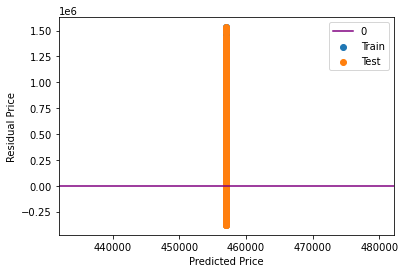

QQ Plot of residuals:


C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly 

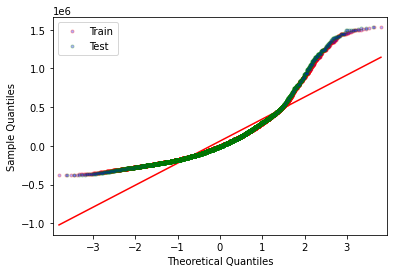

In [447]:
evaluate(y_train, y_test, baseline_train_pred, baseline_test_pred)

### Shit model

In [448]:
def smols(X,y,cols=None):
    Xcol = X[cols]
    shmod = sm.OLS(endog=y, exog=sm.add_constant(Xcol)).fit()
    return shmod

In [449]:
cols = ['sqft_living_log']
smols(X_train,y_train,cols).summary()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.082e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:59:38   Log-Likelihood:                -6223.6
No. Observations:               14211   AIC:                         1.245e+04
Df Residuals:                   14209   BIC:                         1.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.0932      0.057    124.023      0.000       6.981       7.205
sqft_living_log     0.7875      0.008    104.004      0.000       0.773       0.802
==============================================================================
Omnibus:                      118.957   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.117
Skew:                           0.020   Prob(JB):                     6.61e-18
Kurtosis:                       2.637   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [450]:
def linpreds(X_tr_scaled, y_tr, X_te_scaled):
    '''
    Uses Linear Regression to generate output predictions given training and test inputs.
    Arguments:
    X_tr_scaled - dataframe
        Input variables and values for the training set
    y_tr - array-like
        Actual values for output variable, for the training set
    X_te_scaled - dataframe
        Input variables and values for the test set
    Returns:
    Output (y) prediction arrays:
        train, test
    '''
    lr = LinearRegression()
    lr.fit(X_tr_scaled, y_tr)
    return lr.predict(X_tr_scaled), lr.predict(X_te_scaled)

In [451]:
X_train_scaled.columns

Index(['sqft_living', 'sqft_living_log', 'sqft_lot', 'sqft_lot_log',
       'sqft_above', 'sqft_above_log', 'has_basement', 'bedrooms', 'bathrooms',
       'floors', 'Cond_Good', 'Cond_Poor', 'Above Average', 'Excellent', 'Low',
       'bedroom/sqft_living_log', 'bathrooms/sqft_living_log',
       'floors/sqft_living_log', 'has_basement*sqft_living_log',
       'sqft_living_log/sqft_lot_log'],
      dtype='object')

In [452]:
smols(X_train_scaled,y_train,\
      cols=['sqft_living_log']).summary()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.082e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:59:38   Log-Likelihood:                -6223.6
No. Observations:               14211   AIC:                         1.245e+04
Df Residuals:                   14209   BIC:                         1.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.0325      0.003   4143.352      0.000      13.026      13.039
sqft_living_log     0.3271      0.003    104.004      0.000       0.321       0.333
==============================================================================
Omnibus:                      118.957   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.117
Skew:                           0.020   Prob(JB):                     6.61e-18
Kurtosis:                       2.637   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [453]:
smols(X_train_scaled,y_train,\
      cols=['sqft_living_log','Above Average', 'Excellent', 'Low']).summary()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     3607.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:59:38   Log-Likelihood:                -5265.2
No. Observations:               14211   AIC:                         1.054e+04
Df Residuals:                   14206   BIC:                         1.058e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.0325      0.003   4431.944      0.000      13.027      13.038
sqft_living_log     0.2007      0.004     48.627      0.000       0.193       0.209
Above Average       0.1161      0.004     32.270      0.000       0.109       0.123
Excellent           0.1497      0.004     40.799      0.000       0.143       0.157
Low                -0.0417      0.003    -12.532      0.000      -0.048      -0.035
==============================================================================
Omnibus:                       44.485   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.171
Skew:                           0.071   Prob(JB):                     5.14e-09
Kurtosis:                       2.790   Cond. No.                         2.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [454]:
data.columns

Index(['price', 'price_log', 'sqft_living', 'sqft_living_log', 'sqft_lot',
       'sqft_lot_log', 'sqft_above', 'sqft_above_log', 'has_basement',
       'bedrooms', 'bathrooms', 'floors', 'Cond_Good', 'Cond_Poor',
       'Above Average', 'Excellent', 'Low', 'bedroom/sqft_living_log',
       'bathrooms/sqft_living_log', 'floors/sqft_living_log',
       'has_basement*sqft_living_log', 'sqft_living_log/sqft_lot_log'],
      dtype='object')

In [511]:
data

,price,price_log,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,sqft_above,sqft_above_log,sqft_basement,bedrooms,bathrooms,floors
price,1.000000,0.941537,0.679370,0.629791,0.097156,0.145628,0.584342,0.552887,0.285677,0.325003,0.508784,0.278395
price_log,0.941537,1.000000,0.666314,0.655003,0.097791,0.119942,0.569866,0.563827,0.285809,0.338821,0.522754,0.306533
sqft_living,0.679370,0.666314,1.000000,0.962572,0.174213,0.340383,0.867864,0.845020,0.404472,0.598497,0.742126,0.352524
sqft_living_log,0.629791,0.655003,0.962572,1.000000,0.148557,0.318594,0.827452,0.859608,0.404348,0.635979,0.752694,0.361452
sqft_lot,0.097156,0.097791,0.174213,0.148557,1.000000,0.640746,0.183254,0.161812,0.011801,0.033468,0.085077,-0.008236
sqft_lot_log,0.145628,0.119942,0.340383,0.318594,0.640746,1.000000,0.324267,0.310798,0.084036,0.186121,0.085292,-0.245445
sqft_above,0.584342,0.569866,0.867864,0.827452,0.183254,0.324267,1.000000,0.966671,-0.102822,0.487111,0.668839,0.527447
sqft_above_log,0.552887,0.563827,0.845020,0.859608,0.161812,0.310798,0.966671,1.000000,-0.087321,0.524653,0.684475,0.545480
sqft_basement,0.285677,0.285809,0.404472,0.404348,0.011801,0.084036,-0.102822,-0.087321,1.000000,0.301585,0.254192,-0.264540
bedrooms,0.325003,0.338821,0.598497,0.635979,0.033468,0.186121,0.487111,0.524653,0.301585,1.000000,0.521798,0.176726


In [456]:
asd = smols(X_train_scaled,y_train,\
      cols=['sqft_living_log','Above Average', 'Excellent', 'Low',
            'has_basement*sqft_living_log', 'sqft_living_log/sqft_lot_log'])

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [457]:
asd.rsquared

0.5171270522121771

In [458]:
def stepwise_selection(X_tr, y_tr, X_te=None, y_te=None,
                       initial_list=[], no_use=[], 
                       verbose=True):
    """
    Perform a forward-backward feature selection 
    based on R2 from sklearn
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        X_tr - pandas.DataFrame with training candidate features
        y_tr - list-like with the training target
        X_te - pandas.DataFrame with test candidate features
        y_te - list-like with the test target
        initial_list - list of features to start with (column names of X_tr)
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(set(initial_list))
    while True:
        changed=False
        # forward step with R2
        # add feature if the resulting test R2 >= previous test R2
        on_hold = []
        excluded = list(set(X_tr.columns)-set(no_use)-set(included)-set(on_hold))
        new_r2 = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            trpred, tepred = linpreds(X_tr[included+[new_column]], y_tr, 
                                      X_te[included+[new_column]])
            new_r2[new_column] = r2_score(y_te, tepred)
        best_r2 = new_r2.max()
        if best_r2 > r2_score(y_te, tepred):
            best_feature = new_r2.idxmax()
            included.append(best_feature)
            try:
                on_hold.pop()
            except:
                pass
            changed=True
            if verbose:
                print('Add  {:30} with r2: {:.6}'.format(best_feature, best_r2))

        # backward step with RMSE
        trpred, tepred = linpreds(X_tr[included], y_tr, X_te[included])
        y_te_unl, tepred_unl = np.exp(y_te), np.exp(tepred)
        rmse_pre = mean_squared_error(y_te_unl, tepred_unl, squared=False)
        print('Before removal RMSE: {:.2f}'.format(rmse_pre))
        rmses = pd.Series(index=included, dtype='float64')
        for column in included:
            trpred, tepred = linpreds(X_tr[list(set(included)-set(column))], y_tr, 
                                      X_te[list(set(included)-set(column))])
            y_te_unl, tepred_unl = np.exp(y_te), np.exp(tepred)
            rmses[column] = mean_squared_error(y_te_unl, tepred_unl, squared=False)
        lowest_rmse = rmses.min()
        if lowest_rmse < rmse_pre:
            changed=True
            bad_feature = rmses.idxmin()
            on_hold.append(bad_feature)
            included.remove(bad_feature)
            if verbose:
                print('Drop {:30} with RMSE {:.2f}'.format(bad_feature, lowest_rmse))
        else:
            if verbose:
                print('Keep {:30} with RMSE {:.2f}'.format(best_feature, lowest_rmse))
        if not changed:
            break
    return included

In [459]:
stepwise_selection(X_train_scaled, y_train, X_test_scaled, y_test,  \
                   initial_list=['sqft_living_log','Low','Excellent','Above Average'], 
                   no_use=['sqft_living_log/sqft_lot_log','sqft_living','sqft_lot',
                           'sqft_above'])

Add  Cond_Good                      with r2: 0.504756
Before removal RMSE: 202681.79
Drop sqft_living_log                with RMSE 202681.79
Add  sqft_living_log                with r2: 0.504756
Before removal RMSE: 202681.79
Drop Low                            with RMSE 202681.79
Add  sqft_lot_log                   with r2: 0.5095
Before removal RMSE: 199837.82
Keep sqft_lot_log                   with RMSE 199837.82
Before removal RMSE: 199837.82
Keep sqft_lot_log                   with RMSE 199837.82


['Excellent', 'Above Average', 'Cond_Good', 'sqft_living_log', 'sqft_lot_log']

In [460]:
X_train.columns

Index(['sqft_living', 'sqft_living_log', 'sqft_lot', 'sqft_lot_log',
       'sqft_above', 'sqft_above_log', 'has_basement', 'bedrooms', 'bathrooms',
       'floors', 'Cond_Good', 'Cond_Poor', 'Above Average', 'Excellent', 'Low',
       'bedroom/sqft_living_log', 'bathrooms/sqft_living_log',
       'floors/sqft_living_log', 'has_basement*sqft_living_log',
       'sqft_living_log/sqft_lot_log'],
      dtype='object')

In [461]:
relcol = ['has_basement*sqft_living_log',
 'Cond_Good',
 'sqft_lot_log',
 'bedroom/sqft_living_log',
 'Above Average',
 'Excellent',
 'Low',
 'bedrooms',
 'sqft_above_log']
smols(X_train_scaled, y_train, cols=relcol).summary()

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1810.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:59:40   Log-Likelihood:                -4816.2
No. Observations:               14211   AIC:                             9652.
Df Residuals:                   14201   BIC:                             9728.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           13.0325      0.003   4573.416      0.000      13.027      13.038
has_basement*sqft_living_log     0.0741      0.005     16.167      0.000       0.065       0.083
Cond_Good                        0.0526      0.003     17.617      0.000       0.047       0.058
sqft_lot_log                    -0.0340      0.003    -10.849      0.000      -0.040      -0.028
bedroom/sqft_living_log         -0.7034      0.037    -19.235      0.000      -0.775      -0.632
Above Average                    0.1127      0.004     30.326      0.000       0.105       0.120
Excellent                        0.1473      0.004     38.589      0.000       0.140       0.155
Low                             -0.0477      0.003    -14.638      0.000      -0.054      -0.041
bedrooms                         0.7537      0.040     18.691      0.000       0.675       0.833
sqft_above_log                   0.0792      0.008      9.499      0.000       0.063       0.096
==============================================================================
Omnibus:                        1.173   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.171
Skew:                           0.022   Prob(JB):                        0.557
Kurtosis:                       3.000   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train R2 score: 0.542283937540379 
Test R2 score: 0.5360951146151987 
<><><><><>
Train RMSE: $192,508.71 
Test RMSE: $197,350.21 
<><><><><>
Train MAE: $136,373.12 
Test MAE: $138,548.10 

Scatter of residuals:


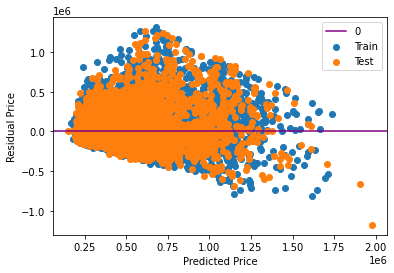

QQ Plot of residuals:


C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly 

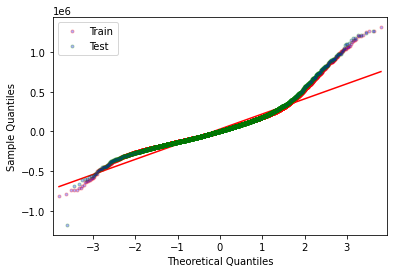

In [462]:
Xftr, Xfte = X_train_scaled[relcol], X_test_scaled[relcol]
trp, tep = linpreds(Xftr, y_train, Xfte)
evaluate(y_train, y_test, trp, tep)

In [463]:
X_tr1, X_te1 = X_train_scaled[['sqft_living_log']], X_test_scaled[['sqft_living_log']]
X_tr2, X_te2 = X_train_scaled[['sqft_living_log','bathrooms']],\
               X_test_scaled[['sqft_living_log','bathrooms']]
X_tr3, X_te3 = X_train_scaled[['sqft_living_log','bathrooms','bedrooms']],\
               X_test_scaled[['sqft_living_log','bathrooms','bedrooms']]
X_tr4, X_te4 = X_train_scaled[['sqft_living_log','bathrooms','bedrooms','floors']],\
               X_test_scaled[['sqft_living_log','bathrooms','bedrooms','floors']]

trp1, tep1 = linpreds(X_tr1, y_train, X_te1)
trp2, tep2 = linpreds(X_tr2, y_train, X_te2)
trp3, tep3 = linpreds(X_tr3, y_train, X_te3)
trp4, tep4 = linpreds(X_tr4, y_train, X_te4)

Train R2 score: 0.4414481084150631 
Test R2 score: 0.4277102650506115 
<><><><><>
Train RMSE: $212,659.15 
Test RMSE: $219,195.23 
<><><><><>
Train MAE: $150,455.85 
Test MAE: $154,950.54 

Scatter of residuals:


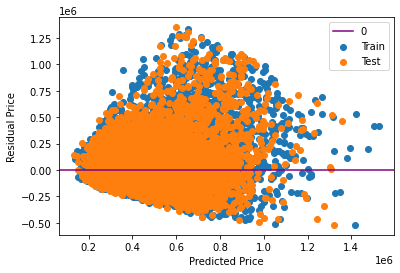

QQ Plot of residuals:


C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly 

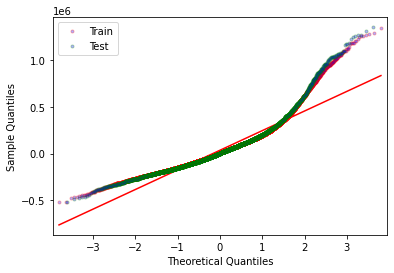

In [464]:
evaluate(y_train, y_test, trp4, tep4)

Train R2 score: 0.44187518426736805 
Test R2 score: 0.42725185100213636 
<><><><><>
Train RMSE: $212,577.84 
Test RMSE: $219,283.00 
<><><><><>
Train MAE: $150,769.64 
Test MAE: $155,264.16 

Scatter of residuals:


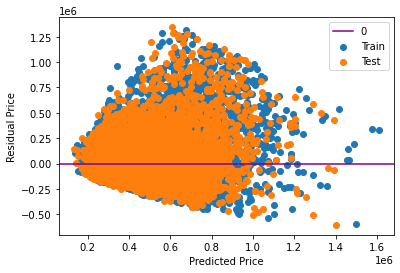

QQ Plot of residuals:


C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly 

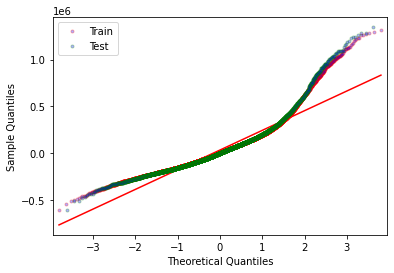

In [465]:
evaluate(y_train, y_test, trp3, tep3)

Train R2 score: 0.43081888707699445 
Test R2 score: 0.4150700969649206 
<><><><><>
Train RMSE: $214,673.06 
Test RMSE: $221,602.69 
<><><><><>
Train MAE: $152,643.03 
Test MAE: $157,290.10 

Scatter of residuals:


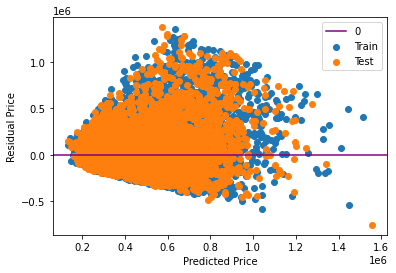

QQ Plot of residuals:


C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly 

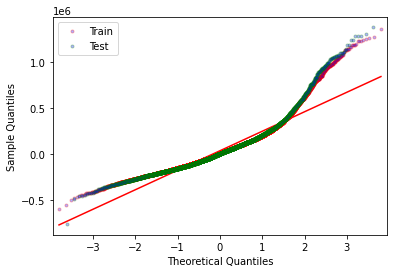

In [466]:
evaluate(y_train, y_test, trp2, tep2)

Train R2 score: 0.42670709363398707 
Test R2 score: 0.41276782914867083 
<><><><><>
Train RMSE: $215,447.07 
Test RMSE: $222,038.37 
<><><><><>
Train MAE: $153,121.43 
Test MAE: $157,580.86 

Scatter of residuals:


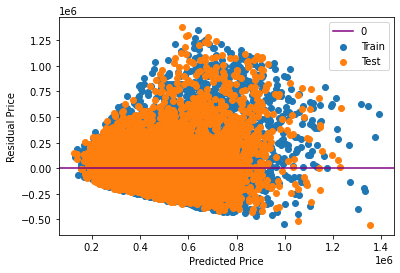

QQ Plot of residuals:


C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly 

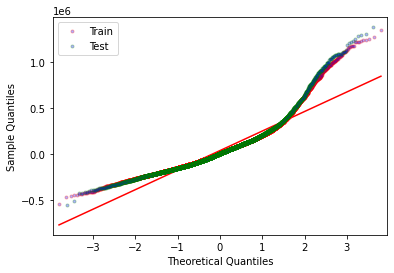

In [467]:
evaluate(y_train, y_test, trp1, tep1)

### Polynomial Features
As seen above, we get only modest improvements in R2 and error calculations, but let's see if we can improve this with interaction terms.

In [468]:
datantot.columns

NameError: name 'datantot' is not defined

In [ ]:
Xpf = datantot.drop(columns=['price_log','price','id','sqft_basement','sqft_living', 'sqft_lot', 'sqft_above'])

pf = PolynomialFeatures(degree=2)
pf.fit(Xpf)
Xpdf = pd.DataFrame(pf.transform(Xpf),\
                   columns=pf.get_feature_names(input_features=Xpf.columns))

Xpf_train, Xpf_test, ypf_train, ypf_test = \
train_test_split(Xpdf, datantot['price_log'], test_size=0.33, random_state=42)

In [ ]:
pfscaler = StandardScaler()
pfscaler.fit(Xpf_train)
Xpf_train_scaled = pfscaler.transform(Xpf_train)
Xpf_test_scaled = pfscaler.transform(Xpf_test)
Xpf_train_scaled = pd.DataFrame(Xpf_train_scaled, columns=Xpf_train.columns, index=Xpf_train.index)
Xpf_test_scaled = pd.DataFrame(Xpf_test_scaled, columns=Xpf_test.columns, index=Xpf_test.index)

In [ ]:
pftrp1, pftep1 = linpreds(Xpf_train_scaled, ypf_train, Xpf_test_scaled)

In [ ]:
evaluate(ypf_train, ypf_test, pftrp1, pftep1)

In [ ]:
Xpf_train_scaled.columns

In [ ]:
smXpf = Xpf_train_scaled.drop(columns='1')
pfsm = smols(smXpf, ypf_train, cols=smXpf.columns)
pfsm_df = pfsm.params.reset_index()
pfsm_df = pfsm_df.merge(pfsm.pvalues.reset_index(), on='index')
pfsm_df = pfsm_df.set_index('index')
pfsm_df.columns = ['coef','p_value']

In [ ]:
pfsm_df.sort_values('coef', ascending=False)

In [ ]:
pfsm_df.sort_values('p_value', ascending=False)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [ ]:
# code here to prepare your data

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
